In [1]:
%matplotlib inline


=============================================================
Receiver Operating Characteristic (ROC) with cross validation
=============================================================

Example of Receiver Operating Characteristic (ROC) metric to evaluate
classifier output quality using cross-validation.

ROC curves typically feature true positive rate on the Y axis, and false
positive rate on the X axis. This means that the top left corner of the plot is
the "ideal" point - a false positive rate of zero, and a true positive rate of
one. This is not very realistic, but it does mean that a larger area under the
curve (AUC) is usually better.

The "steepness" of ROC curves is also important, since it is ideal to maximize
the true positive rate while minimizing the false positive rate.

This example shows the ROC response of different datasets, created from K-fold
cross-validation. Taking all of these curves, it is possible to calculate the
mean area under curve, and see the variance of the curve when the
training set is split into different subsets. This roughly shows how the
classifier output is affected by changes in the training data, and how
different the splits generated by K-fold cross-validation are from one another.

<div class="alert alert-info"><h4>Note</h4><p>See also :func:`sklearn.metrics.roc_auc_score`,
             :func:`sklearn.model_selection.cross_val_score`,
             `sphx_glr_auto_examples_model_selection_plot_roc.py`,</p></div>



************************How to plot a ROC Curve in Python*************************
Accuracy: 0.78 (+/- 0.05) [DecisionTree]
Accuracy: 0.77 (+/- 0.01) [Logistic Regression]
Accuracy: 0.75 (+/- 0.05) [MLP]
Accuracy: 0.85 (+/- 0.06) [Random Forest]
Accuracy: 0.41 (+/- 0.05) [GaussianNB]
Accuracy: 0.82 (+/- 0.06) [Boosting]
confusion_matrix of DecisionTree [[114  16]
 [ 24  24]]
confusion_matrix of Logistic Regression [[129   1]
 [ 48   0]]
confusion_matrix of MLP [[116  14]
 [ 25  23]]
confusion_matrix of Random Forest [[128   2]
 [ 27  21]]
confusion_matrix of GaussianNB [[40 90]
 [19 29]]
confusion_matrix of Boosting [[122   8]
 [ 25  23]]
confusion_matrix of DecisionTree               precision    recall  f1-score   support

           0       0.83      0.88      0.85       130
           1       0.60      0.50      0.55        48

    accuracy                           0.78       178
   macro avg       0.71      0.69      0.70       178
weighted avg       0.77      0.78      0.77    

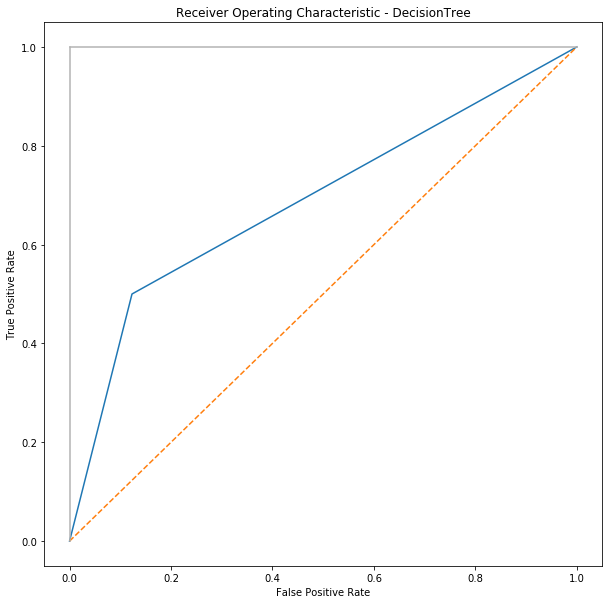

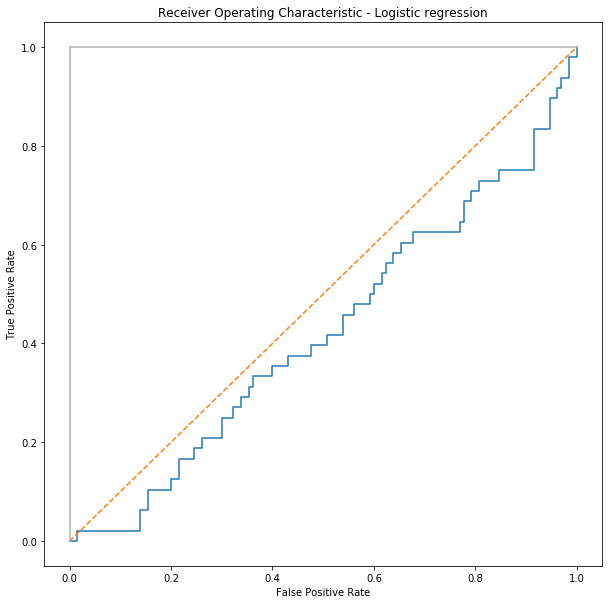

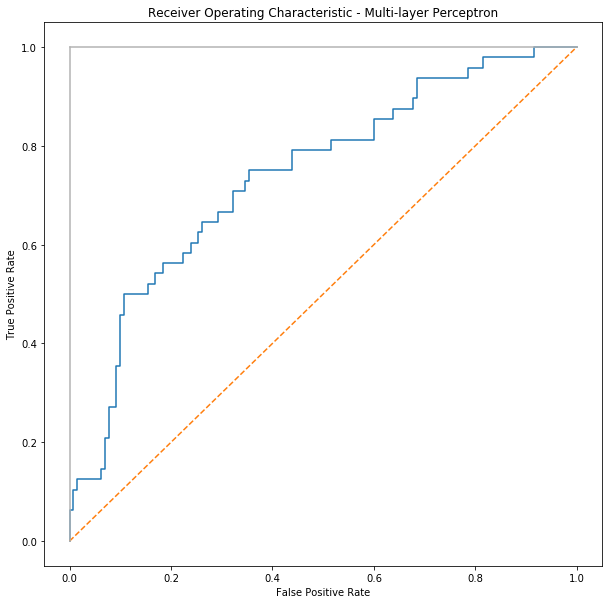

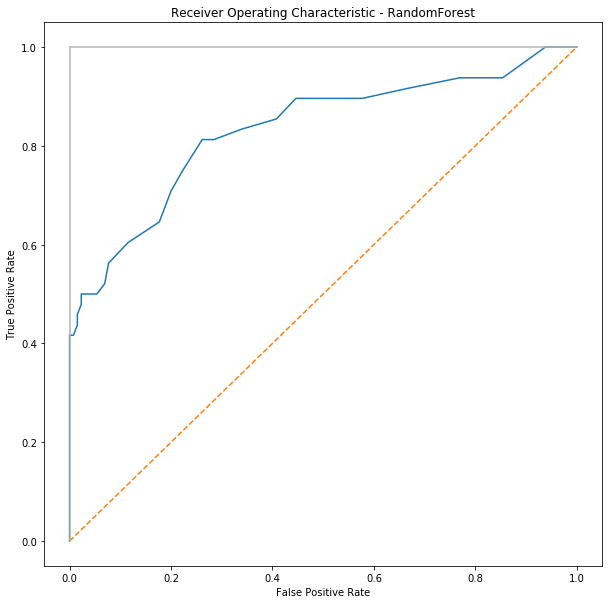

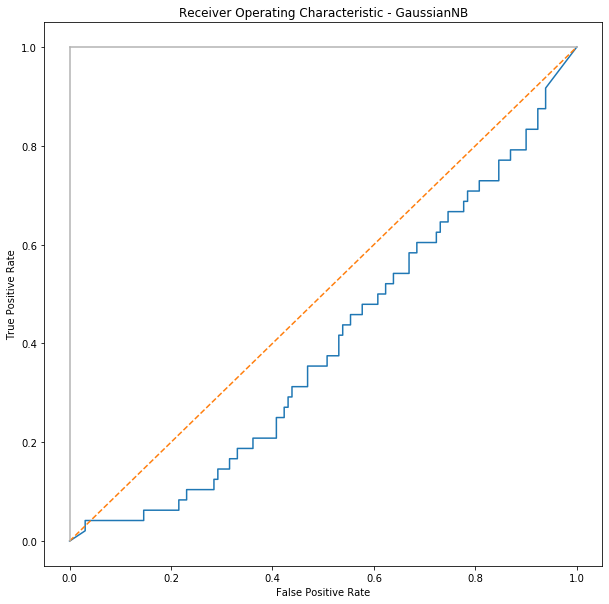

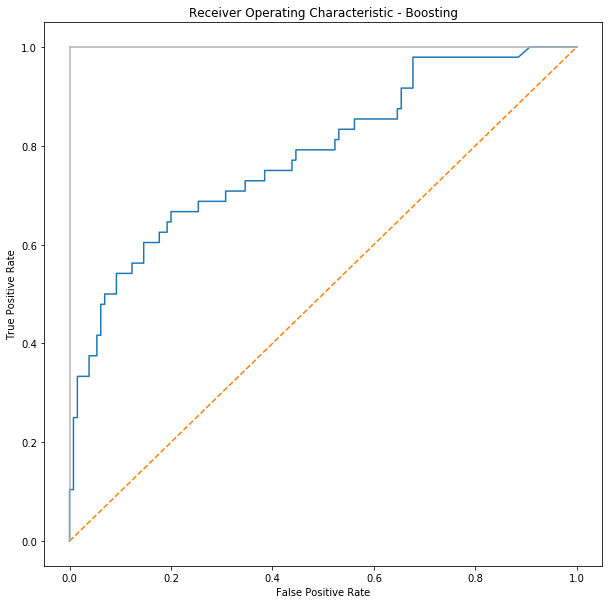

In [2]:
## How to plot a ROC Curve in Python
def Snippet_140():
    print()
    print(format('How to plot a ROC Curve in Python','*^82'))

    import warnings
    warnings.filterwarnings("ignore")

    # load libraries
    from sklearn.datasets import make_classification
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_curve, roc_auc_score
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    from sklearn.naive_bayes import GaussianNB
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import VotingClassifier
    from sklearn.neural_network import MLPClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn import datasets
    from sklearn import metrics
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import matthews_corrcoef
    import pandas as pd
    import numpy as np

    # Create feature matrix and target vector
    df = pd.read_csv('/Users/kefanyang/Desktop/041720_ML_Tile3/TNA_tile3_re/Tile3_training_052120.csv')
   
    
    X = df.drop('Enrichment', axis = 1).drop('WT', axis = 1).drop('Variant', axis = 1).drop('Position', axis = 1).drop('Enrichment_B', axis = 1)
    X1 = df.drop('Enrichment', axis = 1).drop('WT', axis = 1).drop('Variant', axis = 1).drop('Position', axis = 1).drop('Enrichment_B', axis = 1)
    y = df.Enrichment_B


    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    # Create classifier
    clf1 = DecisionTreeClassifier(); 
    clf2 = LogisticRegression();
    clf3 = MLPClassifier(solver='adam', alpha=1e-4,hidden_layer_sizes=(50,50,50), random_state=1)
    clf4 = RandomForestClassifier(n_estimators=50, random_state=1)
    clf5 = GaussianNB()
    clf6 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=10, random_state=0)

    # Train model
    clf1.fit(X_train, y_train); clf2.fit(X_train, y_train); clf3.fit(X_train, y_train); clf4.fit(X_train, y_train);
    clf5.fit(X_train, y_train); clf6.fit(X_train, y_train); 
    
    for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6], [ 'DecisionTree', 'Logistic Regression', 'MLP', 'Random Forest', 'GaussianNB', 'Boosting']):
        scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
        print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    
    y_pred1=clf1.predict(X_test);y_pred2=clf2.predict(X_test);y_pred3=clf3.predict(X_test);y_pred4=clf4.predict(X_test);y_pred5=clf5.predict(X_test);y_pred6=clf6.predict(X_test);

    print("confusion_matrix of DecisionTree", metrics.confusion_matrix(y_test, y_pred1))
    print("confusion_matrix of Logistic Regression", metrics.confusion_matrix(y_test, y_pred2))
    print("confusion_matrix of MLP", metrics.confusion_matrix(y_test, y_pred3))
    print("confusion_matrix of Random Forest", metrics.confusion_matrix(y_test, y_pred4))
    print("confusion_matrix of GaussianNB", metrics.confusion_matrix(y_test, y_pred5))
    print("confusion_matrix of Boosting", metrics.confusion_matrix(y_test, y_pred6))

    print("confusion_matrix of DecisionTree", metrics.classification_report(y_test, y_pred1))
    print("confusion_matrix of Logistic Regression", metrics.classification_report(y_test, y_pred2))
    print("confusion_matrix of MLP", metrics.classification_report(y_test, y_pred3))
    print("confusion_matrix of Random Forest", metrics.classification_report(y_test, y_pred4))
    print("confusion_matrix of GaussianNB", metrics.classification_report(y_test, y_pred5))
    print("confusion_matrix of Boosting", metrics.classification_report(y_test, y_pred6))
    
    print("MCC of DecisionTree", matthews_corrcoef(y_test, y_pred1))
    print("MCC of Logistic Regression",matthews_corrcoef(y_test, y_pred2))
    print("MCC of MLP", matthews_corrcoef(y_test, y_pred3))
    print("MCC of Random Forest", matthews_corrcoef(y_test, y_pred4))
    print("MCC of GaussianNB", matthews_corrcoef(y_test, y_pred5))
    print("MCC of Boosting", matthews_corrcoef(y_test, y_pred6))

    
    # Get predicted probabilities
    y_score1 = clf1.predict_proba(X_test)[:,1]
    y_score2 = clf2.predict_proba(X_test)[:,1]
    y_score3 = clf3.predict_proba(X_test)[:,1]
    y_score4 = clf4.predict_proba(X_test)[:,1]
    y_score5 = clf5.predict_proba(X_test)[:,1]
    y_score6 = clf6.predict_proba(X_test)[:,1]


    # Plot Receiving Operating Characteristic Curve
    # Create true and false positive rates
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
    false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
    false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
    false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_score4)
    false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, y_score5)
    false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, y_score6)
    print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
    print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))
    print('roc_auc_score for MLP: ', roc_auc_score(y_test, y_score3))
    print('roc_auc_score for RandomForest: ', roc_auc_score(y_test, y_score4))
    print('roc_auc_score for GaussianNB: ', roc_auc_score(y_test, y_score5))
    print('roc_auc_score for Boosting: ', roc_auc_score(y_test, y_score6))

    # Plot ROC curves
    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - DecisionTree')
    plt.plot(false_positive_rate1, true_positive_rate1)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - Logistic regression')
    plt.plot(false_positive_rate2, true_positive_rate2)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - Multi-layer Perceptron')
    plt.plot(false_positive_rate3, true_positive_rate3)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - RandomForest')
    plt.plot(false_positive_rate4, true_positive_rate4)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - GaussianNB')
    plt.plot(false_positive_rate5, true_positive_rate5)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - Boosting')
    plt.plot(false_positive_rate6, true_positive_rate6)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    # predictions
    #f3 = pd.read_csv('./Tile3_TNA_Enrichment_Tobepredicted042120.csv')
    #X_pred = f3.drop('Enrichment', axis = 1).drop('WT', axis = 1).drop('Variant', axis = 1).drop('Position', axis = 1)
    #y_pred = clf4.predict(X_pred)
    #f3['Enrichment'] = y_pred
    #f3.to_csv('./E4_RF_prediction.csv')

    
Snippet_140()

In [3]:
f3.head()

NameError: name 'f3' is not defined

In [ ]:
    df = pd.read_csv('./Tile3_DNA_Enrichment_Precessed_Training_forclassification.csv')
   
    
    X = df.drop('Enrichment', axis = 1).drop('WT', axis = 1).drop('Variant', axis = 1).drop('Position', axis = 1).drop('Enrichment_B', axis = 1)
    

In [ ]:
X.head()